# **Yapay sinir ağları uygulaması:**

## "İşten ilk kim ayrılcak?"



##Veri Okuma

Kullanılan kütüphanelerin eklenmesi

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
hr="HR.csv"
df=pd.read_csv(hr)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Sütun öznitelikleri:
* Çalışan memnuniyet oranı, (satisfaction_level) (0-1 aralığında) 
* Son değerlendirme (last_evaluation) (0-1 aralığında)
* Proje sayısı (number_project)
* Ortalama aylık çalışma süresi (average_monthly_hours)
* Şirkette geçirilen yıl (time_spent_company)
* İş kazası geçirilip geçirilmediği (work_accident)
* Son 5 yılda promosyon alıp almadığı (promotion_last_5_years) 
* Departman(sales) 
* Maaş (salary) - (low, medium or high) 
* Çalışanın işten ayrılıp ayrılmadığı (left)

###Encoder kodu

In [ ]:
def converter(x):
  if x=="low":
    return 0
  elif x=="medium":
    return 0.5
  elif x=="high":
    return 1

In [ ]:
def converter1(x):
  if x=="sales":
    return 0
  elif x=="technical":
    return 0.1
  elif x=="support":
    return 0.2
  elif x=="IT":
    return 0.3
  elif x=="product_mng":
    return 0.4
  elif x=="marketing":
    return 0.5
  elif x=="RandD":
    return 0.6
  elif x=="accounting":
    return 0.7
  elif x=="hr":
    return 0.8
  elif x=="management":
    return 0.9

In [ ]:
df['salary']=df['salary'].apply(converter)
df['sales']=df['sales'].apply(converter1)

##Veri Düzenleme

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Bazı sütunlar object türünde modelimizi eğitirken hata vericektir. Object tğrğndeki değerleri nümerik değerlere dönüştürlelim.  

In [ ]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Sütundaki değerler obje türünde olduğundan dönüştürme  işlemi yapalım.

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

Label Encoder değerlerimizi nümerik ifadelere dönüştürür.

In [28]:
df['salary']= label_encoder.fit_transform(df['salary'])

In [ ]:
df['salary'].value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

In [ ]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Sales sutününa da benzer işlemi yapalım.

In [29]:
df['sales']= label_encoder.fit_transform(df['sales'])
#df['sales'].unique()

In [ ]:
df['sales'].value_counts()

7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
Name: sales, dtype: int64

Şimdi veri setimizdeki tüm değerler int ve float türünde

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


Nan değer Kontrolü

In [30]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [31]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


Sutünlardaki bazı değerler çok yüksek bunları 0-1 arasına çekelim.

In [32]:
df['number_project']=(df['number_project']-df['number_project'].min())/(df['number_project'].max()-df['number_project'].min())
df['average_montly_hours']=(df['average_montly_hours']-df['average_montly_hours'].min())/(df['average_montly_hours'].max()-df['average_montly_hours'].min())
df['time_spend_company']=(df['time_spend_company']-df['time_spend_company'].min())/(df['time_spend_company'].max()-df['time_spend_company'].min())
df['sales']=(df['sales']-df['sales'].min())/(df['sales'].max()-df['sales'].min())
df['salary']=(df['salary']-df['salary'].min())/(df['salary'].max()-df['salary'].min())

0-1 Arası Normalizasyon

In [33]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,0.0,0.285047,0.125,0,1,0,0.777778,0.5
1,0.80,0.86,0.6,0.775701,0.500,0,1,0,0.777778,1.0
2,0.11,0.88,1.0,0.822430,0.250,0,1,0,0.777778,1.0
3,0.72,0.87,0.6,0.593458,0.375,0,1,0,0.777778,0.5
4,0.37,0.52,0.0,0.294393,0.125,0,1,0,0.777778,0.5


Left kolonunu en sona alalım

In [34]:
left=df['left']
df=df.drop(['left'],axis=1)

In [35]:
df['left']=left

In [36]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,0.0,0.285047,0.125,0,0,0.777778,0.5,1
1,0.80,0.86,0.6,0.775701,0.500,0,0,0.777778,1.0,1
2,0.11,0.88,1.0,0.822430,0.250,0,0,0.777778,1.0,1
3,0.72,0.87,0.6,0.593458,0.375,0,0,0.777778,0.5,1
4,0.37,0.52,0.0,0.294393,0.125,0,0,0.777778,0.5,1


##Yapay Sinir Ağları Modeli 1

etiket degerimi belirledim.

In [ ]:
degerler=df.values

In [ ]:
dataset=degerler[:,0:9]
etiket=degerler[:,9]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dataset_train,dataset_val_test,etiket_train,etiket_val_test=train_test_split(dataset,etiket,test_size=0.3)

In [ ]:
dataset_val,dataset_test,etiket_val,etiket_test=train_test_split(dataset_val_test,etiket_val_test,test_size=0.5)

Veri setimi validasyon eğitim ve test olarak ayırdım.

In [ ]:
print(dataset_train.shape,etiket_train.shape,dataset_val.shape,etiket_val.shape,dataset_test.shape,etiket_test.shape)

(10499, 9) (10499,) (2250, 9) (2250,) (2250, 9) (2250,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model= Sequential([Dense(32,activation='relu',input_shape=(9,)),Dense(32,activation='relu'),Dense(1,activation='sigmoid'),])

In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(dataset_train,etiket_train,batch_size=32,epochs=100,validation_data=(dataset_val,etiket_val))

Epoch 1/100
329/329 [==============================] - 1s 3ms/step - loss: 0.5996 - accuracy: 0.7487 - val_loss: 0.5065 - val_accuracy: 0.7658
Epoch 2/100
329/329 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7577 - val_loss: 0.4843 - val_accuracy: 0.7658
Epoch 3/100
329/329 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.7599 - val_loss: 0.4642 - val_accuracy: 0.8004
Epoch 4/100
329/329 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7820 - val_loss: 0.4478 - val_accuracy: 0.8044
Epoch 5/100
329/329 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.7925 - val_loss: 0.4368 - val_accuracy: 0.8076
Epoch 6/100
329/329 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.7894 - val_loss: 0.4272 - val_accuracy: 0.8031
Epoch 7/100
329/329 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7819 - val_loss: 0.4205 - val_accuracy: 0.8004

In [ ]:
model.evaluate(dataset_test,etiket_test)

71/71 [==============================] - 0s 904us/step - loss: 0.1457 - accuracy: 0.9591


[0.14565050601959229, 0.9591110944747925]

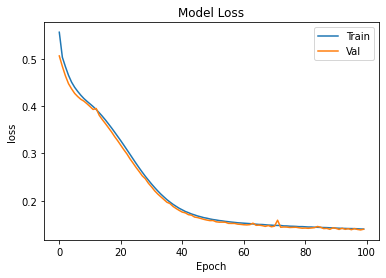

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["Train","Val"])
plt.show()

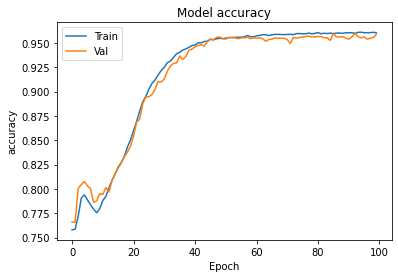

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(["Train","Val"])
plt.show()

##Yapay Sinir Ağları 2

In [37]:
value1=df.values

In [38]:
V1=value1[:,0:9]#
L1=value1[:,9]#etiket değer

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
V1_train,V1_val_test,L1_train,L1_val_test=train_test_split(V1,L1,test_size=0.3)

In [41]:
V1_val,V1_test,L1_val,L1_test=train_test_split(V1_val_test,L1_val_test,test_size=0.5)

In [42]:
from keras.models import Sequential
from keras.layers import Dense

In [43]:
model1= Sequential([Dense(32,activation='relu',input_shape=(9,)),Dense(16,activation='relu'),Dense(16,activation='relu'),Dense(1,activation='sigmoid'),])

In [44]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
hist1=model1.fit(V1_train,L1_train,batch_size=32,epochs=200,validation_data=(V1_val,L1_val))

Epoch 1/200
329/329 [==============================] - 2s 3ms/step - loss: 0.5158 - accuracy: 0.7460 - val_loss: 0.3286 - val_accuracy: 0.8573
Epoch 2/200
329/329 [==============================] - 1s 2ms/step - loss: 0.2934 - accuracy: 0.8737 - val_loss: 0.2417 - val_accuracy: 0.9107
Epoch 3/200
329/329 [==============================] - 1s 2ms/step - loss: 0.2101 - accuracy: 0.9251 - val_loss: 0.1948 - val_accuracy: 0.9351
Epoch 4/200
329/329 [==============================] - 1s 2ms/step - loss: 0.1748 - accuracy: 0.9436 - val_loss: 0.1778 - val_accuracy: 0.9498
Epoch 5/200
329/329 [==============================] - 1s 2ms/step - loss: 0.1720 - accuracy: 0.9477 - val_loss: 0.1654 - val_accuracy: 0.9471
Epoch 6/200
329/329 [==============================] - 1s 2ms/step - loss: 0.1589 - accuracy: 0.9523 - val_loss: 0.1609 - val_accuracy: 0.9556
Epoch 7/200
329/329 [==============================] - 1s 2ms/step - loss: 0.1464 - accuracy: 0.9570 - val_loss: 0.1563 - val_accuracy: 0.9551

In [46]:
model1.evaluate(V1_test,L1_test)[1]

71/71 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9769


0.97688889503479

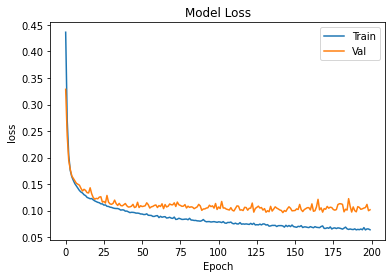

In [47]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["Train","Val"])
plt.show()

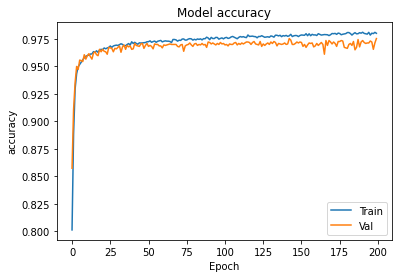

In [48]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(["Train","Val"])
plt.show()

##Yapay Sinir Ağaları Modeli 3

In [ ]:
value3=df.values

In [ ]:
x1=value3[:,0:9]#
y1=value3[:,9]#etiket değer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x1_train,x1_val_test,y1_train,y1_val_test=train_test_split(x1,y1,test_size=0.3)

In [ ]:
x1_val,x1_test,y1_val,y1_test=train_test_split(x1_val_test,y1_val_test,test_size=0.5)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model3= Sequential([Dense(16,activation='relu'),Dense(32,activation='relu'),Dense(1,activation='sigmoid'),])

In [ ]:
model3.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist3=model3.fit(x1_train,y1_train,batch_size=32,epochs=128,validation_data=(x1_val,y1_val))

Epoch 1/128
329/329 [==============================] - 2s 3ms/step - loss: 0.5805 - accuracy: 0.7586 - val_loss: 0.5410 - val_accuracy: 0.7458
Epoch 2/128
329/329 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7593 - val_loss: 0.5239 - val_accuracy: 0.7458
Epoch 3/128
329/329 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.7570 - val_loss: 0.5079 - val_accuracy: 0.7458
Epoch 4/128
329/329 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7706 - val_loss: 0.4906 - val_accuracy: 0.7444
Epoch 5/128
329/329 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.7766 - val_loss: 0.4751 - val_accuracy: 0.7716
Epoch 6/128
329/329 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8001 - val_loss: 0.4632 - val_accuracy: 0.7844
Epoch 7/128
329/329 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.7993 - val_loss: 0.4512 - val_accuracy: 0.7911

In [ ]:
model3.evaluate(x1_test,y1_test)[1]

71/71 [==============================] - 0s 1ms/step - loss: 0.1522 - accuracy: 0.9600


0.9599999785423279

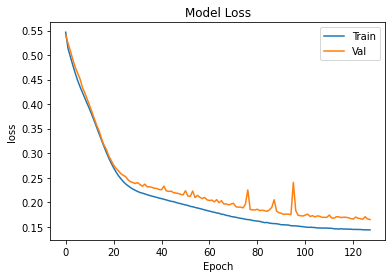

In [ ]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["Train","Val"])
plt.show()

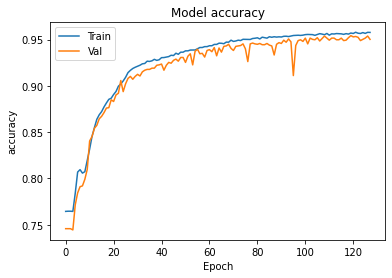

In [ ]:
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(["Train","Val"])
plt.show()

##Karar Ağaçları

In [ ]:
dc_degerler=df.values

In [ ]:
dataset=dc_degerler[:,0:9]
etiket=dc_degerler[:,9]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dataset_train,dataset_val_test,etiket_train,etiket_val_test=train_test_split(dataset,etiket,test_size=0.3)

In [ ]:
dataset_val,dataset_test,etiket_val,etiket_test=train_test_split(dataset_val_test,etiket_val_test,test_size=0.5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn import metrics

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf=clf.fit(dataset_train,etiket_train)
tahmin = clf.predict(dataset_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(etiket_test, tahmin))

Accuracy: 0.9795555555555555


In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =df.columns[0:9],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hr.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

##Rapor

Bu raporda üç adet yapay sinir ağları ve bir adet karar ağacı modeli tasarladım.


İlk ysa modelimde 3 tane katman oluşturdum ilk iki katmanda 32'şer nöron varken son katmanda 1 nöron var. 100 iterasyonla model fit ediliyor.

Modeli eğittikten sonra modelin test verisetindeki başarısı 0.9591 

İkinci ysa modelimde ise 4 tane katman kullandım ilk katmanda 32 nöron var ikinci ve üçüncü katmanda 16'şar nöron son katmanda ise 1 nöron var ve model 200 iterasyonla eğitiliyor.

İkinci ysa modeli eğittikten sonra modelin test verisetindeki başarısı 0.9769

Son ysa modelimde ise 3 katman oluşturdum ilk katman 16 nörondan ikinci 32 nörondan oluşuyor. Son katmanda 1 nöron var toplam 128 iterasyonla model eğitiliyor

Son ysa modeli eğittikten sonra modelin test verisetindeki başarısı 0.9600

Karar ağaçları modeliyle ilgili sklearn kütüphanesinin karar sğscı sınıflandırma kütüphanesi kullandım.

Karar ağaçları sınıflandırma modeliyle 0.9795555555555555'lik başarı sağladım (yaklaşık 0.98)

Benim tasarladığım yapay sinir ağları modellerinden en başarılı olanı 0.9769 başarı sağlanmışken karar ağacı sınıflandırma modeli yaklaşık 0.98 başarı ile ön plana çıkıyor.

##Kaynakça

[Karar Ağaçları](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

[ANN](https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn)

###ann

###d

In [ ]:
values=df.values

In [ ]:
X=values[:,0:9]
Y=values[:,9]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val_test,Y_train,Y_val_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
X_val,X_test,Y_val,Y_test=train_test_split(X_val_test,Y_val_test,test_size=0.5)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,Y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_train,predict_train))
print(classification_report(Y_train,predict_train))

[[7833  155]
 [ 220 2291]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      7988
         1.0       0.94      0.91      0.92      2511

    accuracy                           0.96     10499
   macro avg       0.95      0.95      0.95     10499
weighted avg       0.96      0.96      0.96     10499



In [ ]:
print(confusion_matrix(Y_test,predict_test))
print(classification_report(Y_test,predict_test))

[[1664   41]
 [  41  504]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1705
         1.0       0.92      0.92      0.92       545

    accuracy                           0.96      2250
   macro avg       0.95      0.95      0.95      2250
weighted avg       0.96      0.96      0.96      2250

